<a href="https://colab.research.google.com/github/MubarizKhan/Email-Spam-Detection/blob/main/SpamDetection_DataCollection_InitialExperimentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
    Resources:
     https://www.analyticsvidhya.com/blog/2021/06/automated-spam-e-mail-detection-modelusing-common-nlp-tasks/
     



'''

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
import wordcloud
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

In [ ]:
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
import numpy as np 

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Spam-mail-datasets/spam.csv",encoding='latin-1')

In [ ]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
del df['Unnamed: 3']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 4  6 non-null      object
dtypes: object(4)
memory usage: 174.2+ KB


In [ ]:
del df['Unnamed: 4']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
dtypes: object(3)
memory usage: 130.7+ KB


In [ ]:
del df['Unnamed: 2']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


  # First Dataset Information
  ### In this notebook, we will first be initially be visualizing the first dataset, then we will training a naive bayers & Random Forest model to check the accuracy of our model.
  #### if optimum results haven't been yielded, we will be increasing our dataset by combining several datasets and we will be performing the necessary NLP preprocessing techniques on the data before vectorizing our data for our ML model.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df

In [ ]:
df['v1'].value_counts() #This is showing the ratio of spam to non spam emails in this dataset.

ham     4825
spam     747
Name: v1, dtype: int64

In [ ]:
df['v2'].tail(200)

5372       Ok., is any problem to u frm him? Wats matter?
5373         K I'll head out in a few mins, see you there
5374    Do u konw waht is rael FRIENDSHIP Im gving yuo...
5375    I cant pick the phone right now. Pls send a me...
5376    I don't want you to leave. But i'm barely doin...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 200, dtype: object

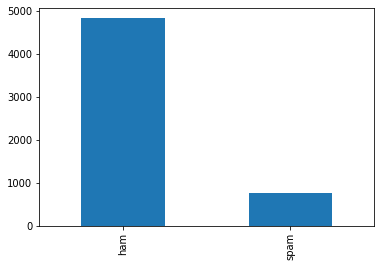

In [ ]:
df['v1'].value_counts().plot(kind='bar')
plt.show()

  ## Percentage of spam to Non-spam emails in our first dataset

In [ ]:
print("Not a Spam Email Ratio i.e. 0 label:",round(len(df[df['v1']=="ham"])/len(df['v1']),2)*100,"%")
print("Spam Email Ratio that is 1 label:",round(len(df[df['v1']=="spam"])/len(df['v1']),2)*100,"%")

Not a Spam Email Ratio i.e. 0 label: 87.0 %
Spam Email Ratio that is 1 label: 13.0 %


In [ ]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df['length'] = df.v2.str.len()

In [ ]:
df

,v1,v2,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161
5568,ham,Will Ì_ b going to esplanade fr home?,37
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


## Lemmatizer and Removal of Stop words

In [ ]:
import string
import nltk
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

df['v2'] = df['v2'].apply(lambda x: " ".join(term for term in x.split() if term not in stop_words))

In [ ]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
# import these modules
import nltk
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

print("rocks :", lemmatizer.lemmatize("games"))
print("corpora :", lemmatizer.lemmatize("corpora"))

# a denotes adjective in "pos"
print("better :", lemmatizer.lemmatize("better", pos ="a"))


rocks : game
corpora : corpus
better : good


In [ ]:
'''
  sentence segmentation
  word tokenization
  stemming
  lemmatizing
  removal of stopwords
  dependency parsing
  POS tags
  Named Entity Recognition

'''

'\n  sentence segmentation\n  word tokenization\n  stemming\n  lemmatizing\n  removal of stopwords\n  dependency parsing\n  POS tags\n  Named Entity Recognition\n\n'

In [ ]:
df

,v1,v2,length
0,ham,"Go jurong point, crazy.. Available bugis n gre...",111
1,ham,Ok lar... Joking wif oni...,29
2,spam,Free entry wkly comp win FA Cup final tkts 21s...,155
3,ham,U dun say early hor... U c already say...,49
4,ham,"Nah I think goes usf, lives around though",61
...,...,...,...
5567,spam,This 2nd time tried contact u. U å£750 Pound p...,161
5568,ham,Will Ì_ b going esplanade fr home?,37
5569,ham,"Pity, * mood that. So...any suggestions?",57
5570,ham,The guy bitching I acted like i'd interested b...,125


In [ ]:
del df['label']

In [ ]:
## Assigning Labels to ham-spam(1 for spam, 0 for not spam) columns in order to create target label column
### Sub-section under the sub-section under Section 2

#### Assigning Labels to ham-spam(1 for spam, 0 for not spam) columns in order to create target label column


In [ ]:
df['label'] = df['v1'].apply(lambda x:1 if x=='spam' else 0)
# del df['length']
df.head(20)

,v1,v2,length,label
0,ham,"Go jurong point, crazy.. Available bugis n gre...",111,0
1,ham,Ok lar... Joking wif oni...,29,0
2,spam,Free entry wkly comp win FA Cup final tkts 21s...,155,1
3,ham,U dun say early hor... U c already say...,49,0
4,ham,"Nah I think goes usf, lives around though",61,0
5,spam,FreeMsg Hey darling 3 week's word back! I'd li...,148,1
6,ham,Even brother like speak me. They treat like ai...,77,0
7,ham,As per request 'Melle Melle (Oru Minnaminungin...,160,0
8,spam,WINNER!! As valued network customer selected r...,158,1
9,spam,Had mobile 11 months more? U R entitled Update...,154,1


In [ ]:
'''
    testing_modelData is a list which contains those spam emails, which'll use to check our initial trained model. 
'''

"\n    testing_modelData is a list which contains those spam emails, which'll use to check our initial trained model. \n"

In [ ]:
testing_modelData = ["Attention: Sir/Madam,Good day to you. I write to inform you that the United Nations Compensation Award Committee (UNCAC) has approved a payment of 2.5 M USD in your favor in regards to your long over due payment. Being for Contract payment/Past Lottery  winners/ Scam Victims. Kindly contact your payment officer for more details. Kindly use your payment reference number UNCAC/8377/FABGH/2022 for immediate attention. Provide the requested details below for confirmation Congratulations and we are looking forward to hearing  from you.",
      "I just wanted to know if you require a better solution to manage SEO, SMO, SMM, PPC Campaigns, keyword research, Reporting etc. We are a leading Digital Marketing Agency, offering marketing solutions at affordable prices. We can manage all as we have a 150+ expert team of professionals and help you save a hefty amount on hiring resources. Interested?  Do write back to me, I’d love to chat. 15 day free trial on 3 SEO Projects Let me know if you are interested, and I will send you our SEO Packages and price list.",
      "I thought Id just pop you a quick email to check if you are happy with your Business Google Listings. The majority of your potential customers will look for the services you offer on Google but may not be able to find you! I can show how I’ll be able to help you to get more customers through your Business Website, simply reply to this email with the area you would like to cover? Once I have the area, I will see how your Business Listings are ranking and will be able to give you a quick discussion over the phone. Please reply with your contact number and we will give a quick No Obligation call.",
      "To use your credit, click the new WAP link in the next years txt message or click here", 
      "Thanks for your subscription to New Ringtone UK your new mobile will be charged £5/month Please confirm annoncement by replying", 
      "As a valued customer, I am pleased to advise you that following recent delivery waiting review of your Mob No. you are awarded with. Call us to review.", 
      "Please call our new customer service representative on", 
      "We are trying to contact you. Last weekends customer draw shows that you won a £1000 prize GUARANTEED. Calling years",
      "I hope you are well.This is the final email regarding TEST FIRM’s nomination in the Research and Development Awards 2022, courtesy of Acquisition International. As mentioned before this nomination is subject to your confirmation, which is still currently pending and the deadline for your decision is Monday 11th July 2022. If you would like to join the shortlist for 2022 please can you confirm by selecting ‘Accept Nomination’ below.Accept Nomination If you’d rather not take part, please select: Decline Nomination I’d also like to mention again that there are no compulsory costs associated with your nomination. We offer free of charge items alongside optional celebratory packages for awardees to select. If there are any issues that are preventing you from making your decision or if you have any questions, please do not hesitate to get in touch - you can also find our FAQ’s HERE.I look forward to hearing your decision.",
      "I'm looking at your current website www.website.com.au and I'm wondering if you've thought about updating your website?My name is Katie Lee and I am a website  designer and search engine optimisation specialist.We work with clients all over Australia and every single client that we’ve worked with have seen a positive increase in their search engine rankings. In fact, most of our clients are ranked on the top half of the first page of Google for most of their keywords.I am confident that I can design you a great looking website that will not only give you a fresh look, but is also focused on generating more visitors, leads & revenue for your business.We develop our websites on the easy to use platform WordPress and many more.We work with all budgets and can tailor packages to suit your needs and are mobile responsive, load quickly and come optimised around your keywords at no extra cost, although we do recommend on-going search engine optimisation in most cases.If this sounds of interest to you, let’s have a chat!What is the best number to reach you on?Kind Regards,Katie Lee If you are not interested, then you can reply with a simple message for removing you.",
      "I just wanted to know if you require a better solution to manage SEO, SMO, PPC, Facebook, Twitter and LinkedIn Marketing, keyword research, Reporting etc. We are a leading Digital Marketing Agency, offering marketing solutions worldwide.",
      "We can manage all as we have a 300+ expert team of professionals and help you save a hefty amount on hiring resources. Marketing Services: SEO | PPC | SMO | SMM A NEW 15 day’s trial offer on any of your project! Let me know if you are interested, I will send you our SEO Packages and price list.",
      "Everyone knows Google loves authority links because they command respect. A mix of Do-follow backlinks from High authority domains as DA 30+ with a trust flow of 10+ and domain authority of 30+ can really help your site rank well in search engines. I am a PR and outreach expert, and I can help you do media outreach that gets results. I will help you to get a blog post on these high-authority sites with backlinks to your site. If you are looking for various niches like News, Marketing, Business, Finance, Travel, Education, Health, Home, Fashion, Lifestyle then our agency is right for your requirements. This is not just a random mail but a promise of prompt service with quality at an affordable price.Please note: 1 - I accept all URLs except Gambling/Casino etc. 2 - Permanent posts. 3 - I guarantee high-quality content 4 - No cheap article spinning or duplicate content 5 - Proofreading by a native author. Building a business relationship with you will be our proud privilege. I am looking forward to hearing from you soon. Warm Regards"
    ]
lst2 = []
lst3 = [] 
for i in range(len(testing_modelData)):
  lst2.append(1)
  lst3.append('spam')

df_check = pd.DataFrame(list(zip(lst3, testing_modelData, lst2)), columns =['v1','v2','label'])
print(df_check)

      v1                                                 v2  label
0   spam  Attention: Sir/Madam,Good day to you. I write ...      1
1   spam  I just wanted to know if you require a better ...      1
2   spam  I thought Id just pop you a quick email to che...      1
3   spam  To use your credit, click the new WAP link in ...      1
4   spam  Thanks for your subscription to New Ringtone U...      1
5   spam  As a valued customer, I am pleased to advise y...      1
6   spam  Please call our new customer service represent...      1
7   spam  We are trying to contact you. Last weekends cu...      1
8   spam  I hope you are well.This is the final email re...      1
9   spam  I'm looking at your current website www.websit...      1
10  spam  I just wanted to know if you require a better ...      1
11  spam  We can manage all as we have a 300+ expert tea...      1
12  spam  Everyone knows Google loves authority links be...      1


In [ ]:
new_df = pd.concat([df, df_check])#.drop_duplicates(keep=False)
new_df.info() #new_df is the combination of our initial dataset and testing_modelData.
new_df.tail(13)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5585 entries, 0 to 12
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   v1      5585 non-null   object 
 1   v2      5585 non-null   object 
 2   length  5572 non-null   float64
 3   label   5585 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 218.2+ KB


,v1,v2,length,label
0,spam,"Attention: Sir/Madam,Good day to you. I write ...",NaN,1
1,spam,I just wanted to know if you require a better ...,NaN,1
2,spam,I thought Id just pop you a quick email to che...,NaN,1
3,spam,"To use your credit, click the new WAP link in ...",NaN,1
4,spam,Thanks for your subscription to New Ringtone U...,NaN,1
5,spam,"As a valued customer, I am pleased to advise y...",NaN,1
6,spam,Please call our new customer service represent...,NaN,1
7,spam,We are trying to contact you. Last weekends cu...,NaN,1
8,spam,I hope you are well.This is the final email re...,NaN,1
9,spam,I'm looking at your current website www.websit...,NaN,1


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

## Vectorizing converts our data into numbers, so that it can be processed by a Machine Learning model.

In [ ]:
# vec = TfidfVectorizer(min_df = 1, max_df =2, max_features=20, ngram_range=(1,3))    
# vec = TfidfVectorizer(min_df = 1, max_df =2, max_features=3, ngram_range=(1,3))    
vec = TfidfVectorizer(min_df = 10) #Words occuring in less than 2 documents ae eliminated

In [ ]:
# df['v2'] = vec.fit_transform(df['v2'])
x = vec.fit_transform(new_df['v2'])

In [ ]:
x.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
x

<5585x991 sparse matrix of type '<class 'numpy.float64'>'
	with 38298 stored elements in Compressed Sparse Row format>

In [ ]:
x[-13:] #last 13 elements

<13x991 sparse matrix of type '<class 'numpy.float64'>'
	with 417 stored elements in Compressed Sparse Row format>

In [ ]:
x[:5572] #first 5572 elements, as the last 13 elements is our testing data which is totally unseen for our model, being unseen for model is necessary to test the real accuracy of our model.

<5572x991 sparse matrix of type '<class 'numpy.float64'>'
	with 37881 stored elements in Compressed Sparse Row format>

In [ ]:
# df['label'].iloc[:5572]

In [ ]:
checking_pred = x[-13:]

In [ ]:
vec.get_feature_names()

In [ ]:
a

In [ ]:
vec.vocabulary_

In [ ]:
type(x)

scipy.sparse.csr.csr_matrix

In [ ]:
x[2]

<1x126 sparse matrix of type '<class 'numpy.float64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [ ]:
df['label']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x[:5572], new_df['label'].iloc[:5572], test_size=0.33, random_state=42)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nbc = MultinomialNB()
nbc.fit(X_train,y_train)
y_pred = nbc.predict(X_test)

In [ ]:
# nbc.predict()

In [ ]:
acc = metrics.accuracy_score(y_test, y_pred)
print(acc,': Accuracy of our Naive Bayes on data which it has an idea of.')

0.9749864056552474 : Accuracy of our Naive Bayes on data which it has an idea of.


In [ ]:
# df = pd.concat([df, df_check]).drop_duplicates(keep=False)
# df.tail(20)

In [ ]:
# df.sample(10)

In [ ]:
# df_check.head(5)

In [ ]:
test_pred = nbc.predict(x[-13:])

In [ ]:
# prediction on Spam email dataset 
acc = metrics.accuracy_score(new_df['label'].iloc[-13:],test_pred)
print(acc, 'of Naive Bayes on unseen data')

0.38461538461538464 of Naive Bayes on unseen data


In [ ]:
''' The drop in accuracy is bound to increase after preprocessing our data and increasing our data '''

' The drop in accuracy is bound to increase after preprocessing our data and increasing our data '

In [ ]:
rfy_pred, test_pred ## These are the predictions made my our models

(array([0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators =15)
model = model.fit(X_train,y_train)
rfy_pred = model.predict(X_test)
acc = metrics.accuracy_score(y_test, rfy_pred)
print(model.score(X_test,y_test))

0.9804241435562806


In [ ]:
''' acc of Random Forest on unseen data '''
rfy_pred = model.predict(x[-13:])
acc = metrics.accuracy_score(new_df['label'].iloc[-13:],rfy_pred)
acc

0.38461538461538464

In [ ]:
# a ="I just wanted to know if you require a better solution to manage SEO, SMO, SMM, PPC Campaigns, keyword research, Reporting etc. We are a leading Digital Marketing Agency, offering marketing solutions at affordable prices."
# b ="We can manage all as we have a 150+ expert team of professionals and help you save a hefty amount on hiring resources."
# c ="Interested?  Do write back to me, I’d love to chat."
# s ="15 day free trial on 3 SEO Projects"
# ss = "Let me know if you are interested, and I will send you our SEO Packages and price list."



In [ ]:
corpus = open('/content/drive/MyDrive/Spam-mail-datasets/ham/0002.1999-12-13.farmer.ham.txt').read()
docs = corpus.split('\n')
type(docs)
 



list

In [ ]:
import os

print(os.getcwd())
print(os.listdir())


/content


In [ ]:
# !ls
!cd /content/drive/MyDrive/
!ls


drive  sample_data


In [ ]:
!cd /content/drive/MyDrive/Spam-mail-datasets/training_dataset_spammy
!ls
print(os.listdir())

drive  sample_data
['.config', 'drive', 'sample_data']


In [ ]:
docs


In [ ]:
len(docs[0])

In [ ]:
docs[0]

'Subject: vastar resources , inc .'

In [ ]:
str_ = ''
for i in docs:
  str_ += i

print(str_)

Subject: vastar resources , inc .gary , production from the high island larger block a - 1 # 2 commenced onsaturday at 2 : 00 p . m . at about 6 , 500 gross . carlos expects between 9 , 500 and10 , 000 gross for tomorrow . vastar owns 68 % of the gross production .george x 3 - 6992- - - - - - - - - - - - - - - - - - - - - - forwarded by george weissman / hou / ect on 12 / 13 / 99 10 : 16am - - - - - - - - - - - - - - - - - - - - - - - - - - -daren j farmer12 / 10 / 99 10 : 38 amto : carlos j rodriguez / hou / ect @ ectcc : george weissman / hou / ect @ ect , melissa graves / hou / ect @ ectsubject : vastar resources , inc .carlos ,please call linda and get everything set up .i ' m going to estimate 4 , 500 coming up tomorrow , with a 2 , 000 increase eachfollowing day based on my conversations with bill fischer at bmar .d .- - - - - - - - - - - - - - - - - - - - - - forwarded by daren j farmer / hou / ect on 12 / 10 / 99 10 : 34am - - - - - - - - - - - - - - - - - - - - - - - - - - -en